In [1]:
#import pandas, numpy and seaborn

import pandas as pd
import numpy as np
import seaborn as sns

#read the data in an xlsx file saved in my drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install openpyxl
import openpyxl

In [5]:
#Reading the dataset
file_path = file_path = "/content/drive/My Drive/Colab Notebooks/energydata_complete.csv"

# Read the Excel file using pandas
try:
    data = pd.read_csv(file_path)
    print(data.head())
except Exception as e:
    print("Error loading Excel file:", e)

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [6]:
#Summary
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


<Axes: xlabel='T2', ylabel='T6'>

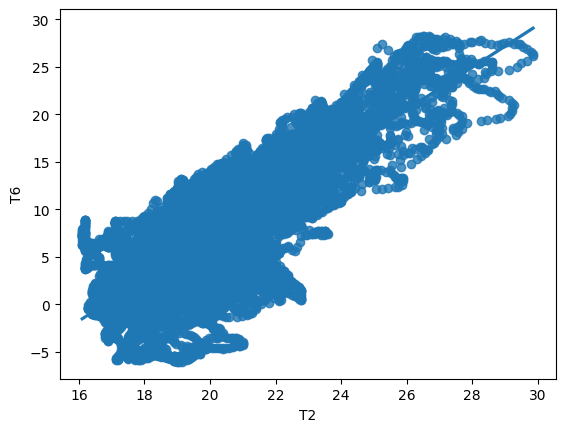

In [35]:
#linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6)
#plotting
t2_t6_df = data[['T2','T6']]
sns.regplot(x="T2", y="T6", data = t2_t6_df)

In [40]:
#calculate the the Root Mean Squared error in three D.P
# Splitting into training and test sets
from sklearn.model_selection import train_test_split

slr_features = t2_t6_df[['T2']]
slr_target = t2_t6_df[['T6']]
x_train_slr, x_test_slr, y_train_slr, y_test_slr = train_test_split(slr_features, slr_target, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
linear_model_slr = LinearRegression()
linear_model_slr.fit(x_train_slr, y_train_slr)

# Predict on the training set
predicted_values_slr = linear_model_slr.predict(x_test_slr)

# Calculate Mean Squared Error (MSE) for the test set
mse_train_slr = mean_squared_error(y_test_slr, predicted_values_slr)

# Calculate RMSE for the training set
rmse_train_slr = np.sqrt(mse_train_slr)

# Print RMSE for the training set rounded to three decimal places
print("Root Mean Squared Error (Training Set):", round(rmse_train_slr, 3))

Root Mean Squared Error (Training Set): 3.63


In [10]:
#Multiple linear regression


In [24]:
#Remove columns
data1 = data.drop(columns = ['date','lights'])


In [26]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# Separating features and target
X = data1.drop(columns=['Appliances'])
y = data1['Appliances']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data, and transform the test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert scaled data back to DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Separating features and target
features_train = x_train_scaled_df
target_train = y_train
features_test = x_test_scaled_df
target_test = y_test

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(features_train, target_train)



LinearRegression()

In [28]:
# Predict on the training set
predicted_values = linear_model.predict(features_train)

# Evaluate the model using Mean Absolute Error (MAE)

mae = mean_absolute_error(target_train, predicted_values)
print("Mean Absolute Error:", round(mae, 3))

Mean Absolute Error: 53.742


In [21]:
#rmse on training set
from sklearn.metrics import mean_squared_error

# Predict target values for the training set
predicted_train = linear_model.predict(x_train_scaled_df)

# Calculate Mean Squared Error (MSE) for the training set
mse_train = mean_squared_error(y_train, predicted_train)

# Calculate RMSE for the training set
rmse_train = np.sqrt(mse_train)

# Print RMSE for the training set rounded to three decimal places
print("Root Mean Squared Error (Training Set):", round(rmse_train, 3))

Root Mean Squared Error (Training Set): 95.216


In [22]:
#mae on test set
from sklearn.metrics import mean_absolute_error

# Predict target values for the test set
predicted_test = linear_model.predict(x_test_scaled_df)

# Calculate MAE for the test set
mae_test = mean_absolute_error(y_test, predicted_test)

# Print MAE for the test set rounded to three decimal places
print("Mean Absolute Error (Test Set):", round(mae_test, 3))

Mean Absolute Error (Test Set): 53.643


In [23]:
#mse on test set
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict target values for the test set
predicted_test = linear_model.predict(x_test_scaled_df)

# Calculate Mean Squared Error (MSE) for the test set
mse_test = mean_squared_error(y_test, predicted_test)

# Calculate RMSE for the test set
rmse_test = np.sqrt(mse_test)

# Print RMSE for the test set rounded to three decimal places
print("Root Mean Squared Error (Test Set):", round(rmse_test, 3))

Root Mean Squared Error (Test Set): 93.64


In [29]:
#No overfitting as performance on both training and test is relatively closer

In [30]:
#Ridge model
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model with default parameters
ridge_model = Ridge()

# Train the model on the training set
ridge_model.fit(x_train_scaled_df, y_train)

# Predict target values for the test set
predicted_test_ridge = ridge_model.predict(x_test_scaled_df)

# Calculate Mean Squared Error (MSE) for the test set
mse_test_ridge = mean_squared_error(y_test, predicted_test_ridge)

# Calculate RMSE for the test set
rmse_test_ridge = np.sqrt(mse_test_ridge)

# Print RMSE for the test set rounded to three decimal places
print("Root Mean Squared Error (Ridge Regression, Test Set):", round(rmse_test_ridge, 3))

Root Mean Squared Error (Ridge Regression, Test Set): 93.709


In [31]:
#Lasso model

from sklearn.linear_model import Lasso

# Initialize Lasso Regression model with default parameters
lasso_model = Lasso()

# Train the model on the training set
lasso_model.fit(x_train_scaled_df, y_train)

# Get the feature weights (coefficients) from the trained model
feature_weights = lasso_model.coef_

# Count the number of features with non-zero weights
num_non_zero_features = np.sum(feature_weights != 0)

print("Number of features with non-zero weights:", num_non_zero_features)

Number of features with non-zero weights: 4


In [33]:
#New rmse
# Predict target values for the test set
predicted_test_lasso = lasso_model.predict(x_test_scaled_df)

# Calculate Mean Squared Error (MSE) for the test set
mse_test_lasso = mean_squared_error(y_test, predicted_test_lasso)

# Calculate RMSE for the test set
rmse_test_lasso = np.sqrt(mse_test_ridge)

# Print RMSE for the test set rounded to three decimal places
print("Root Mean Squared Error (Lasso Regression, Test Set):", round(rmse_test_lasso, 3))

Root Mean Squared Error (Ridge Regression, Test Set): 93.709
